<a href="https://colab.research.google.com/github/EthanSonenshine/NEUR-3002/blob/main/ICA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Below is Python code that runs an Integrate and Fire Model, Take some time to investigate the code and then complete the worksheet on Canvas titled "Worksheet 2, Integrate & Fire"

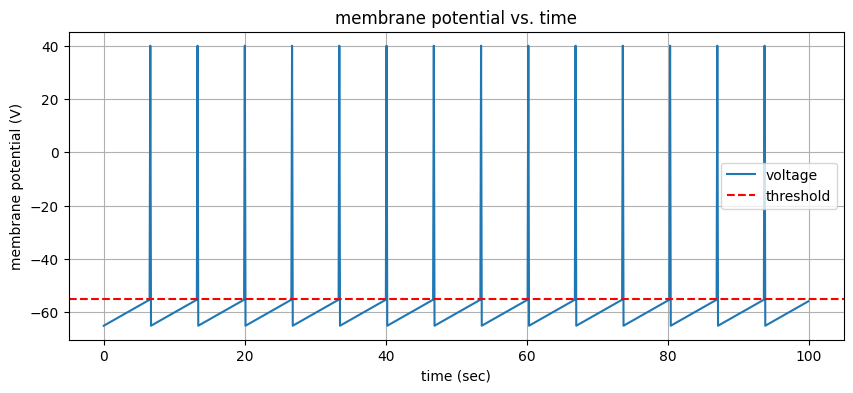

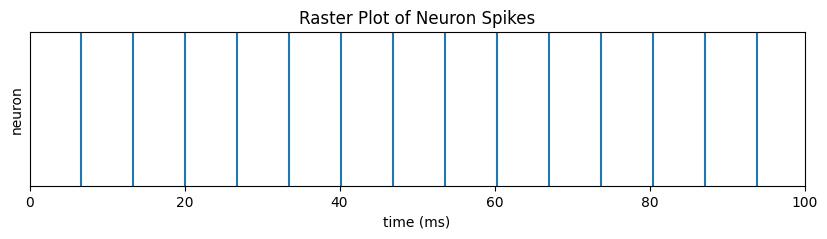

In [ ]:
# Jupyter: enable plot rendering inside the notebook (this allows us to actually show the output of the code visually)
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# --- Neuron Parameters (realistic, in mV and pA) ---
C = 200.0   # This is Capacitance, the ability of the membrane to store charge
V_th = -55.0 # This is the threshold potential that the voltage must reach for an AP
V_reset = -65.0 # This is the Membrane potential after Hyperpolarization
V_rest =  -65.0 # This is the Resting Membrane Potential
I_ext = 300.0  # This is the current, the flow of ions
dt = 0.1


T = 100          # total simulation time in ms
dt = 0.1         # time step in ms
time = np.arange(0, T, dt)  # time vector

# --- Initialize voltage and spike times ---
V = np.full_like(time, V_rest)  # set all values to resting voltage
spike_times = []

# --- Simulation Loop ---
for i in range(1, len(time)):
    dV = (I_ext / C) * dt       # ΔV = (I / C) * dt, in mV
    V[i] = V[i-1] + dV

    if V[i] >= V_th:
        V[i-1] = 40.0           # mark spike as +40 mV (for visualization)
        V[i] = V_reset
        spike_times.append(time[i])

# --- Plotting ---
plt.figure(figsize=(10, 4))
plt.plot(time, V, label='voltage')
plt.axhline(V_th, color='r', linestyle='--', label='threshold')
plt.xlabel('time (sec)') #what should the x be?
plt.ylabel('membrane potential (V)') #what should the y be?
plt.title('membrane potential vs. time') #what is a good title?
plt.legend() #can you think of a legend?
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 2))

# draw vertical lines at spike times
plt.vlines(spike_times, 0, 1)

plt.xlim(0, T)
plt.ylim(0, 1)
plt.xlabel("time (ms)")
plt.ylabel("neuron")
plt.title("Raster Plot of Neuron Spikes")

# hide y-axis ticks (since it's one neuron)
plt.yticks([])

plt.show()